In [169]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
from scipy.stats import zscore

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb


from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV 


import warnings 
warnings.filterwarnings('ignore')

In [138]:
df = pd.read_csv(r'C:\Users\hites\Downloads\winequality-red.csv')

In [139]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [140]:
df.shape

(1599, 12)

In [141]:
#description of the data 

df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
#As per my observation:

#There is a big gap between 75% and max values of residual sugar column
#There is a big gap between 75% and max values of free sulfur dioxide column
#There is a huge gap between 75% and max value of total sulfur dioxide column
#All these gaps indicate that there are outliers present in our dataset which might need to be treated so as to get a better model accuracy later.

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [99]:
#checking the null values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [142]:
df.skew() # acceptable range is +/-0.5

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

In [144]:
#Here we see the skewness information present in our dataset. We will ignore quality since it is our target label in the dataset. Now taking a look at all the feature columns we see that fixed acidity, volatile acidity, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, sulphates and alcohol are all outside the acceptable range of +/-0.5. This skewness indicates outliers being present in our dataset that will need to be treated if required.

In [145]:
df.groupby('quality').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


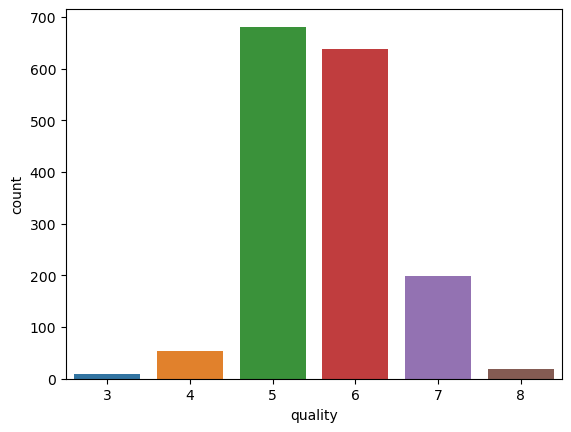

In [146]:
#VISUALIZATION

sns.countplot(df['quality'])
plt.show()

In [147]:
df_features = df.drop('quality', axis=1)

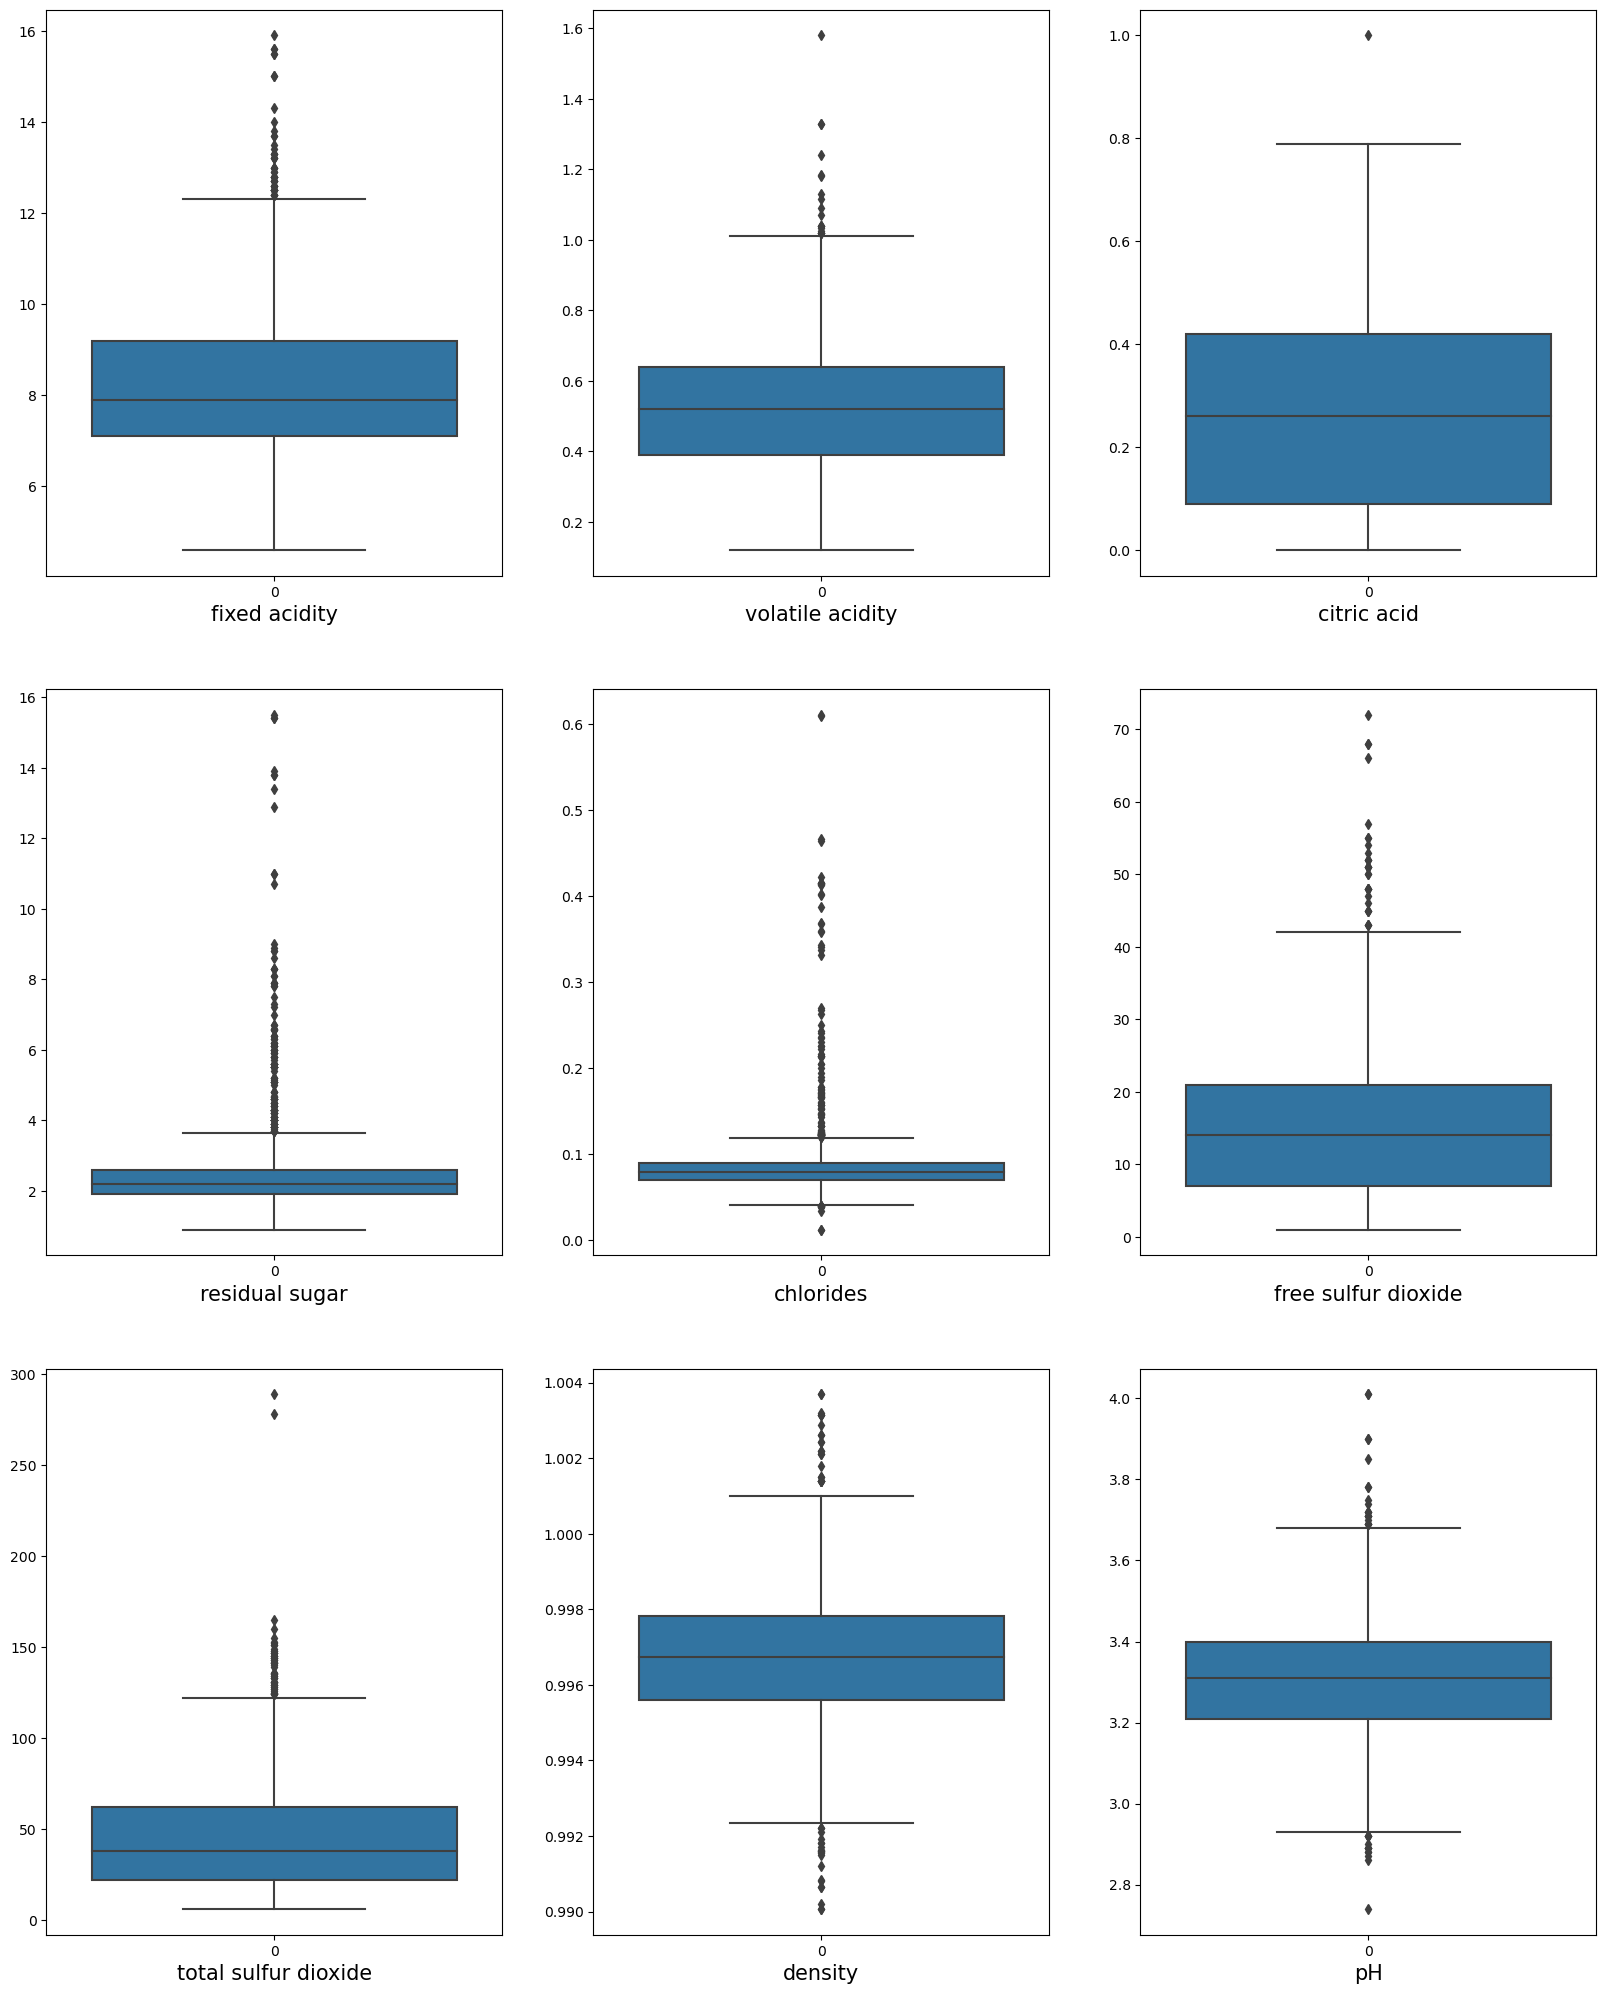

In [148]:
#plotting the boxplot


plt.figure(figsize=(20,25))
graph = 1

for column in df_features:
    if graph<=9 :
        plt.subplot(3,3,graph)
        sns.boxplot(data=df_features[column])
        plt.xlabel(column,fontsize=15)
        
    graph+=1
plt.show()

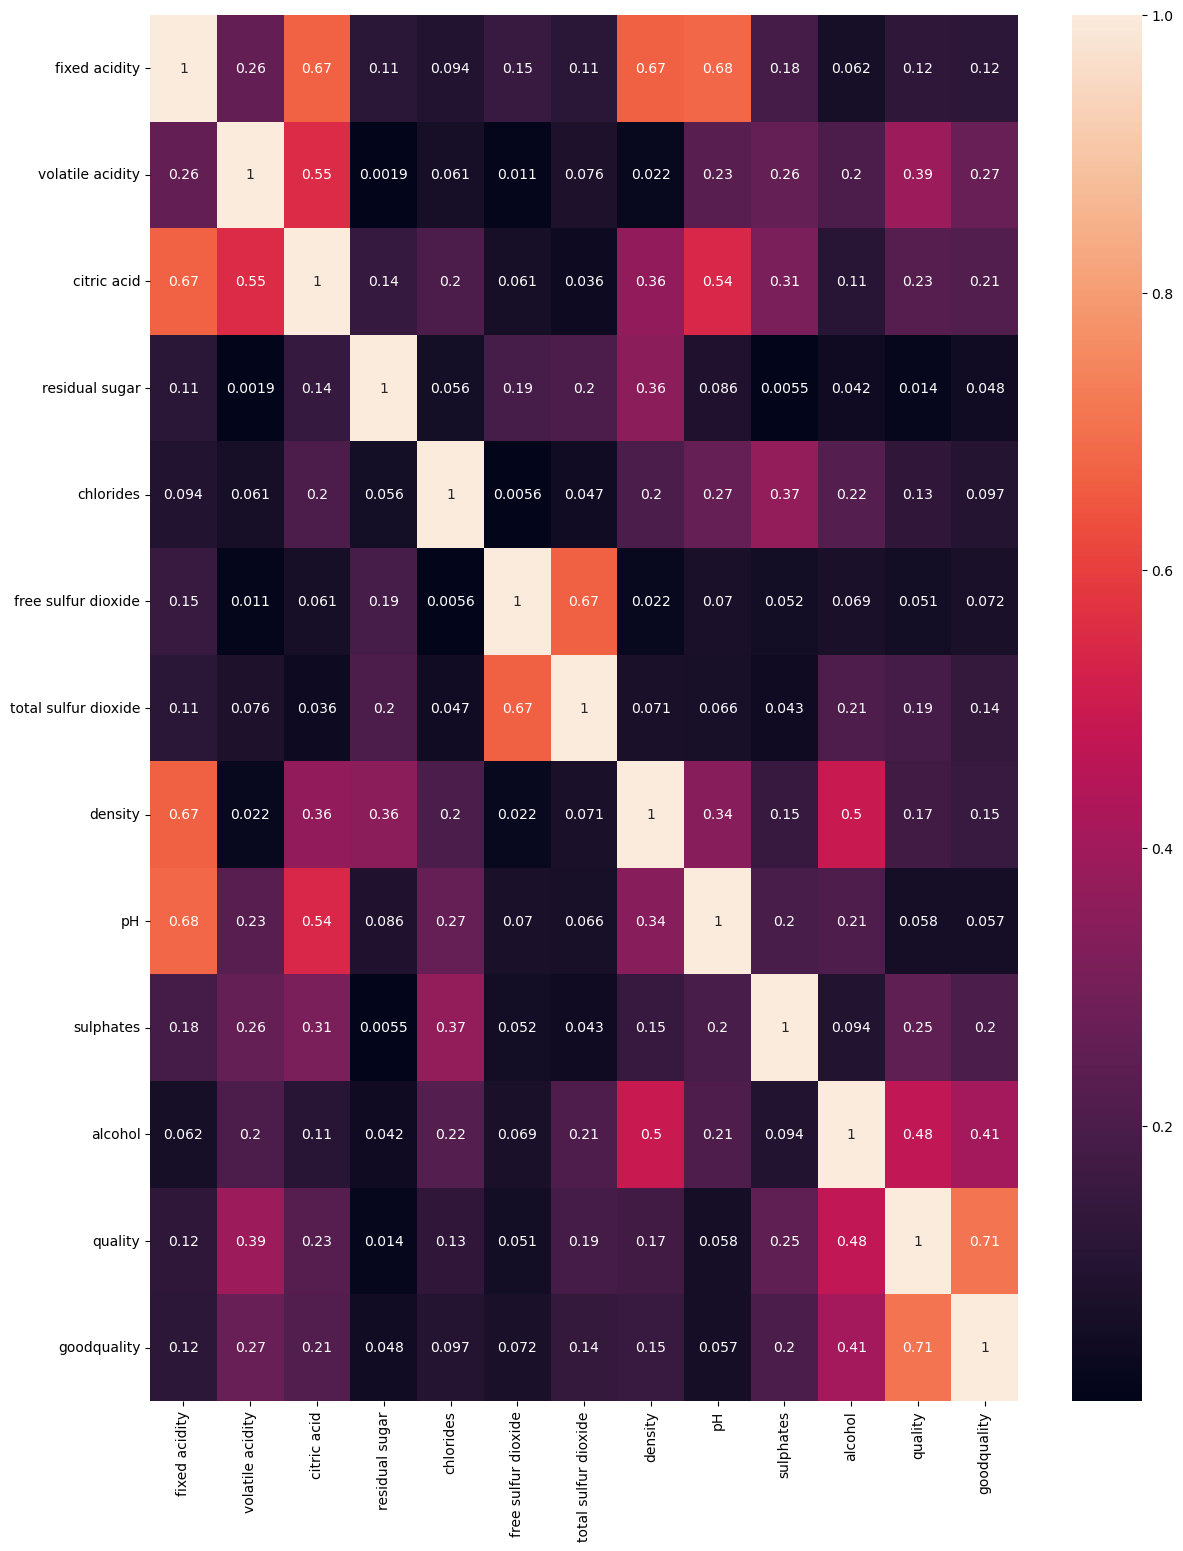

In [149]:
#plotting heatmap(correlation matrix)

df_corr = data.corr().abs()

plt.figure(figsize = (14,18))

sns.heatmap(df_corr,annot=True, annot_kws = {'size':10})
plt.show()

In [150]:
data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,goodquality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052,0.120061
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558,-0.270712
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373,0.214716
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732,0.047779
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907,-0.097308
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656,-0.071747
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100,-0.139517
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919,-0.150460
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731,-0.057283
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397,0.199485


<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

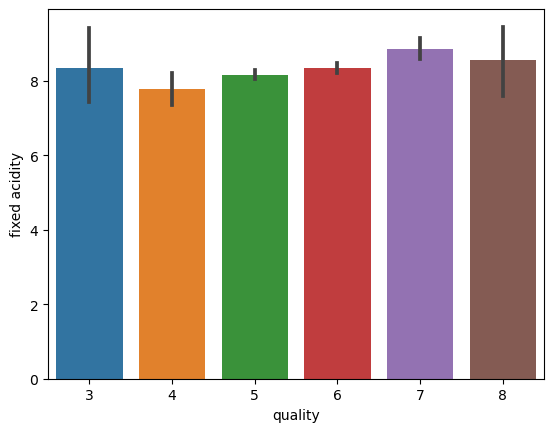

In [151]:
sns.barplot(y='fixed acidity', x='quality', data=df)

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

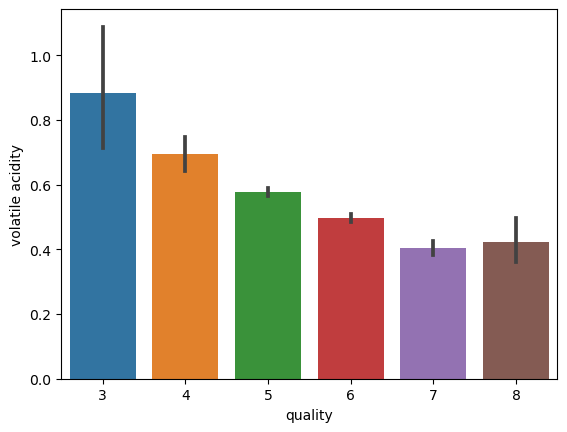

In [152]:
sns.barplot(y='volatile acidity', x='quality', data=df)


<AxesSubplot:xlabel='quality', ylabel='citric acid'>

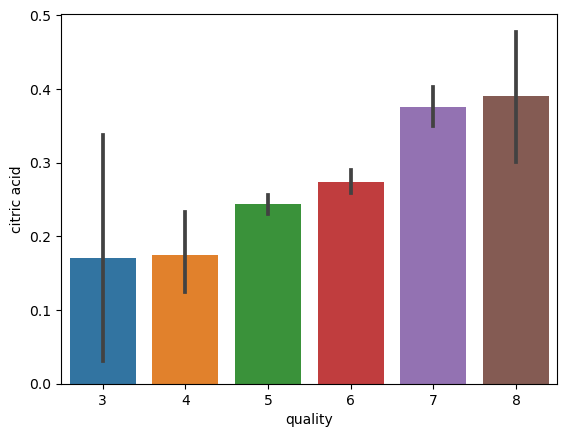

In [153]:
sns.barplot(y='citric acid', x='quality', data=df)

<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

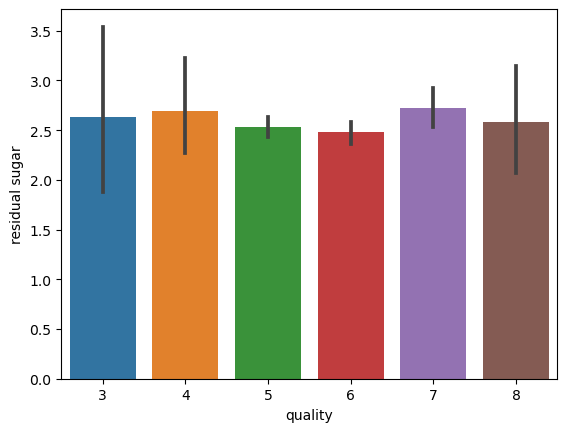

In [154]:
sns.barplot(y='residual sugar', x='quality', data=df)

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

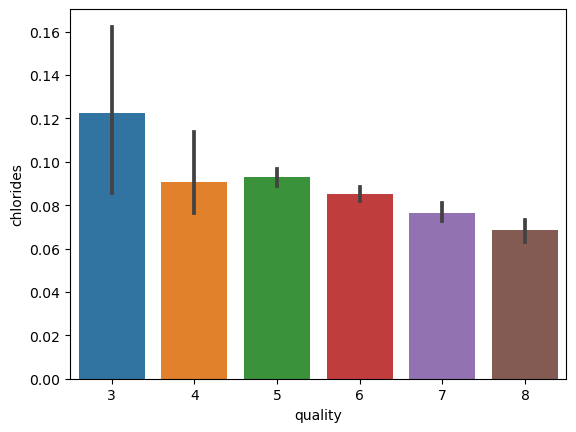

In [155]:
sns.barplot(y='chlorides', x='quality', data=df)

<AxesSubplot:xlabel='quality', ylabel='free sulfur dioxide'>

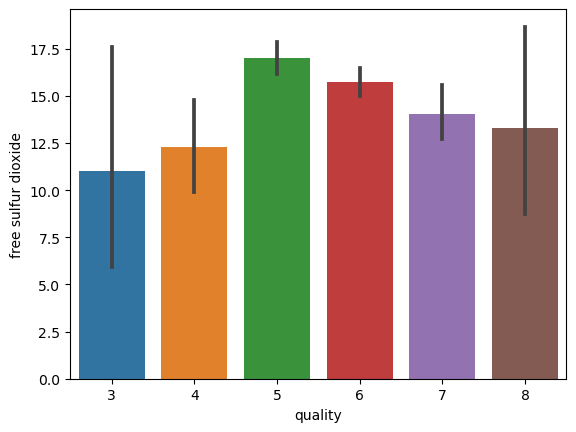

In [156]:
sns.barplot(y='free sulfur dioxide', x='quality', data=df)

<AxesSubplot:xlabel='quality', ylabel='total sulfur dioxide'>

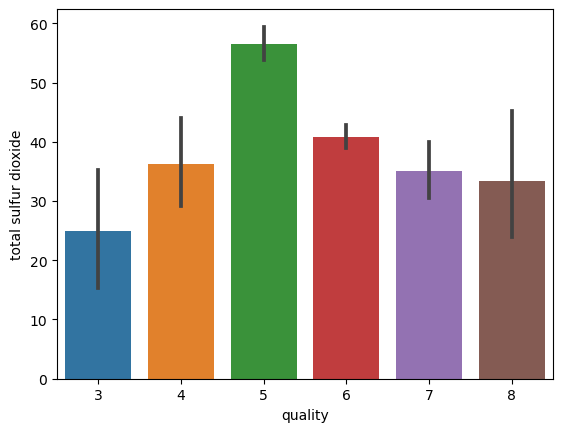

In [157]:
sns.barplot(y='total sulfur dioxide', x='quality', data=df)

<AxesSubplot:xlabel='quality', ylabel='density'>

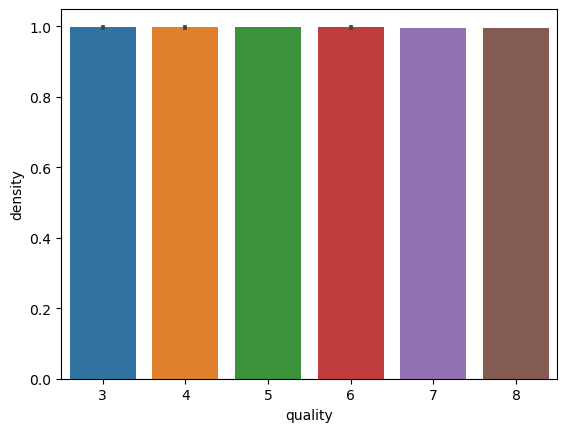

In [158]:
sns.barplot(y='density', x='quality', data=df)

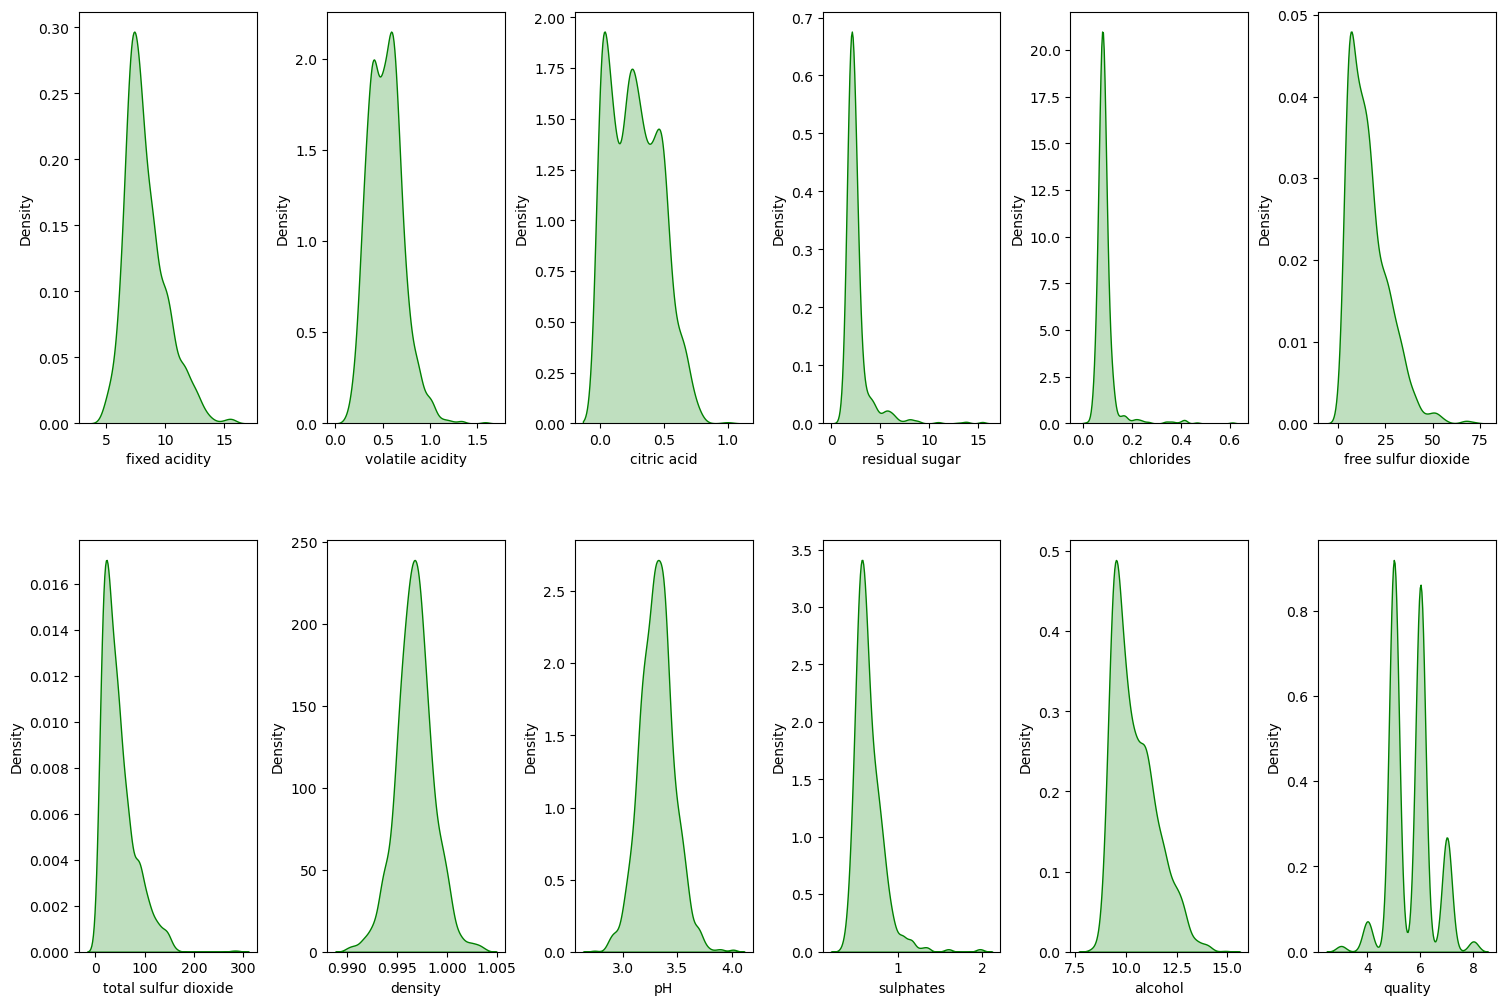

In [159]:
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(15,10))
index = 0
ax = ax.flatten()
for col, value in df.items():
    sns.distplot(value, ax=ax[index], hist=False, color="g", kde_kws={"shade": True})
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)
plt.show()

In [162]:
#Outlier removal

# Z score method

z=np.abs(zscore(df))
threshold=3
np.where(z>3)

df=df[(z<3).all(axis=1)]
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [163]:
df.shape

(1451, 12)

In [164]:
# Percentage of Data Loss

data_loss=(1599-1464)/1599*100 
# 1599 (number of rows in the original dataframe) and 1464 (number of rows after outlier removal)
data_loss

8.442776735459661

In [165]:
X = df.drop('quality', axis=1)
Y = df['quality']

In [166]:
Y.value_counts()

5    617
6    586
7    185
4     47
8     16
Name: quality, dtype: int64

In [170]:
# adding samples to make all the categorical quality values same

oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

In [171]:
Y.value_counts()

5    617
6    617
7    617
4    617
8    617
Name: quality, dtype: int64

In [172]:
Y # Displaying just the label

0       5
1       5
2       5
3       6
4       5
       ..
3080    8
3081    8
3082    8
3083    8
3084    8
Name: quality, Length: 3085, dtype: int64

In [173]:
Y = Y.apply(lambda y_value:1 if y_value>=7 else 0) # 1 is for good quality and 0 for bad (not good) quality
Y # Displaying the label after applying label binarization

0       0
1       0
2       0
3       0
4       0
       ..
3080    1
3081    1
3082    1
3083    1
3084    1
Name: quality, Length: 3085, dtype: int64

In [174]:
X # Displaying all the features except the label

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000
1,7.800000,0.880000,0.000000,2.600000,0.098000,25.000000,67.000000,0.996800,3.200000,0.680000,9.800000
2,7.800000,0.760000,0.040000,2.300000,0.092000,15.000000,54.000000,0.997000,3.260000,0.650000,9.800000
3,11.200000,0.280000,0.560000,1.900000,0.075000,17.000000,60.000000,0.998000,3.160000,0.580000,9.800000
4,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000
...,...,...,...,...,...,...,...,...,...,...,...
3080,7.721723,0.528904,0.131096,2.202153,0.066761,30.673212,40.890438,0.994174,3.416947,0.732172,12.445599
3081,7.248047,0.395215,0.292383,2.024024,0.056721,16.521499,30.281262,0.994676,3.248418,0.758398,11.412110
3082,8.633547,0.312556,0.413866,1.847444,0.078270,28.861034,47.722067,0.994342,3.116645,0.666789,11.589777
3083,12.562955,0.318834,0.718575,2.285489,0.072399,6.000000,28.715035,0.998703,2.889689,0.816295,9.902587


In [176]:
#Feature Scaling

In [177]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.643690,1.011913,-1.500273,-0.642650,-0.121305,-0.282338,-0.107860,0.837851,1.451626,-0.797945,-1.266959
1,-0.391173,2.020427,-1.500273,0.143147,1.114363,1.280563,1.154852,0.244322,-0.770537,0.124984,-0.910291
2,-0.391173,1.348085,-1.294417,-0.193623,0.777362,0.164205,0.657420,0.363028,-0.340441,-0.105748,-0.910291
3,1.755217,-1.341285,1.381713,-0.642650,-0.177472,0.387477,0.887004,0.956557,-1.057268,-0.644124,-0.910291
4,-0.643690,1.011913,-1.500273,-0.642650,-0.121305,-0.282338,-0.107860,0.837851,1.451626,-0.797945,-1.266959
...,...,...,...,...,...,...,...,...,...,...,...
3080,-0.440589,0.053290,-0.825602,-0.303463,-0.640216,1.913897,0.155796,-1.314338,0.784600,0.526245,1.448704
3081,-0.739616,-0.695752,0.004446,-0.503425,-1.204159,0.334059,-0.250154,-1.016361,-0.423463,0.727952,0.527176
3082,0.135038,-1.158879,0.629648,-0.701648,0.006192,1.711593,0.417201,-1.214680,-1.368046,0.023378,0.685595
3083,2.615639,-1.123704,2.197805,-0.209912,-0.323564,-0.840517,-0.310084,1.373719,-2.994931,1.173243,-0.818818


In [180]:
#spliting the dataset

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 44)


In [ ]:
#Machine Learning Model for Classification and Evaluation Metrics

In [181]:
# Classification Model Function

def classify(model, X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=21)
    
    # Training the model
    model.fit(X_train, Y_train)
    
    # Predicting Y_test
    pred = model.predict(X_test)
    
    # Accuracy Score
    acc_score = (accuracy_score(Y_test, pred))*100
    print("Accuracy Score:", acc_score)
    
    # Classification Report
    class_report = classification_report(Y_test, pred)
    print("\nClassification Report:\n", class_report)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of accuracy minus cv scores
    result = acc_score - cv_score
    print("\nAccuracy Score - Cross Validation Score is", result)

In [182]:
# Logistic Regression

model=LogisticRegression()
classify(model, X, Y)

Accuracy Score: 88.49270664505673

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.89      0.90       375
           1       0.84      0.87      0.86       242

    accuracy                           0.88       617
   macro avg       0.88      0.88      0.88       617
weighted avg       0.89      0.88      0.89       617

Cross Validation Score: 87.52025931928686

Accuracy Score - Cross Validation Score is 0.9724473257698634


In [183]:
# Support Vector Classifier

model=SVC(C=1.0, kernel='rbf', gamma='auto', random_state=42)
classify(model, X, Y)

Accuracy Score: 91.41004862236629

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93       375
           1       0.89      0.90      0.89       242

    accuracy                           0.91       617
   macro avg       0.91      0.91      0.91       617
weighted avg       0.91      0.91      0.91       617

Cross Validation Score: 90.34035656401946

Accuracy Score - Cross Validation Score is 1.0696920583468312


In [184]:
# Decision Tree Classifier

model=DecisionTreeClassifier(random_state=21, max_depth=15)
classify(model, X, Y)

Accuracy Score: 92.54457050243113

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94       375
           1       0.90      0.92      0.91       242

    accuracy                           0.93       617
   macro avg       0.92      0.92      0.92       617
weighted avg       0.93      0.93      0.93       617

Cross Validation Score: 88.49270664505673

Accuracy Score - Cross Validation Score is 4.0518638573744


In [185]:
# Random Forest Classifier

model=RandomForestClassifier(max_depth=15, random_state=111)
classify(model, X, Y)

Accuracy Score: 95.46191247974069

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.94      0.96       375
           1       0.91      0.98      0.94       242

    accuracy                           0.95       617
   macro avg       0.95      0.96      0.95       617
weighted avg       0.96      0.95      0.95       617

Cross Validation Score: 92.18800648298216

Accuracy Score - Cross Validation Score is 3.273905996758529


In [186]:
# K Neighbors Classifier

model=KNeighborsClassifier(n_neighbors=15)
classify(model, X, Y)

Accuracy Score: 89.46515397082658

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.87      0.91       375
           1       0.82      0.93      0.87       242

    accuracy                           0.89       617
   macro avg       0.89      0.90      0.89       617
weighted avg       0.90      0.89      0.90       617

Cross Validation Score: 88.39546191247975

Accuracy Score - Cross Validation Score is 1.0696920583468312


In [188]:
# XGB Classifier

model=xgb.XGBClassifier(verbosity=0)
classify(model, X, Y)

Accuracy Score: 95.9481361426256

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.95      0.97       375
           1       0.92      0.98      0.95       242

    accuracy                           0.96       617
   macro avg       0.95      0.96      0.96       617
weighted avg       0.96      0.96      0.96       617

Cross Validation Score: 92.83630470016207

Accuracy Score - Cross Validation Score is 3.111831442463526


In [189]:
#Hyper parameter tuning on the best ML Model

In [190]:
# Choosing Support Vector Classifier

svc_param = {'kernel' : ['poly', 'sigmoid', 'rbf'],
             'gamma' : ['scale', 'auto'],
             'shrinking' : [True, False],
             'random_state' : [21,42,104],
             'probability' : [True, False],
             'decision_function_shape' : ['ovo', 'ovr'],
             'verbose' : [True, False]}

In [191]:
GSCV = GridSearchCV(SVC(), svc_param, cv=5)

In [193]:
GSCV.fit(X_train,Y_train)

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'decision_function_shape': ['ovo', 'ovr'],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['poly', 'sigmoid', 'rbf'],
                         'probability': [True, False],
                         'random_state': [21, 42, 104],
                         'shrinking': [True, False], 'verbose': [True, False]})

In [194]:
GSCV.best_params_

{'decision_function_shape': 'ovo',
 'gamma': 'auto',
 'kernel': 'rbf',
 'probability': True,
 'random_state': 21,
 'shrinking': True,
 'verbose': True}

In [195]:
Final_Model = SVC(decision_function_shape='ovo', gamma='auto', kernel='rbf', probability=True, random_state=21,
                 shrinking=True, verbose=True)
Classifier = Final_Model.fit(X_train, Y_train)
fmod_pred = Final_Model.predict(X_test)
fmod_acc = (accuracy_score(Y_test, fmod_pred))*100
print("Accuracy score for the Best Model is:", fmod_acc)

[LibSVM]Accuracy score for the Best Model is: 92.33261339092873


In [196]:
#AUC ROC Curve

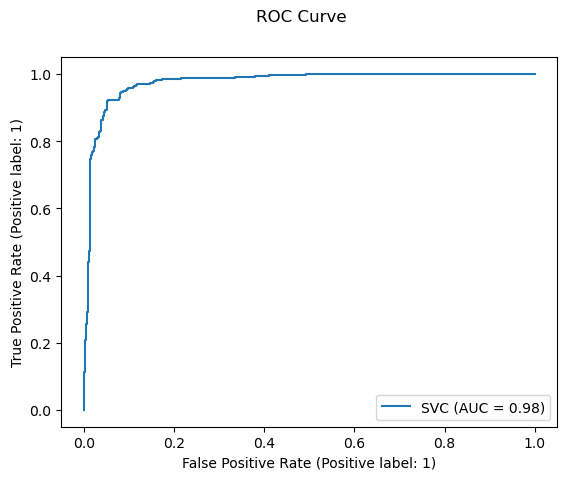

In [197]:
disp = metrics.plot_roc_curve(Final_Model, X_test, Y_test)
disp.figure_.suptitle("ROC Curve")
plt.show()

In [198]:
#Confusion Matrix

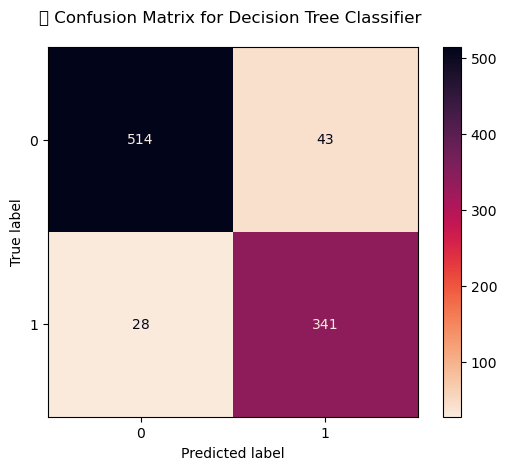

In [202]:
class_names = df.columns
metrics.plot_confusion_matrix(Classifier, X_test, Y_test, cmap='rocket_r')
plt.title('\t Confusion Matrix for Decision Tree Classifier \n')
plt.show()